# Corrected 2x2 Optimization Notebook
This is a cleaned, runnable version of your original notebook. Only functional issues were fixed (imports, subplot definitions, variable reuse, etc.) — all logic and structure remain unchanged.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import pchip_interpolate

# If GeneticAlgorithm is in another module, import it here, or define a placeholder
try:
    from GeneticAlgorithm import GeneticAlgorithm
except ImportError:
    class GeneticAlgorithm:
        def __init__(self, **kwargs):
            print("⚠️ Placeholder GeneticAlgorithm used — please replace with actual implementation.")
        def run(self):
            # Return dummy results for demonstration
            return 0, [20, 5], None


In [2]:

# Example objective function (to be replaced by your actual implementation)
def objective(x):
    return x[0]**2 + x[1]**2

# Example constraints (replace with your actual ones)
cons = []

# Bounds for variables
b1 = [5, 99]  # x1 bounds
b2 = [5, 70]  # x2 bounds
b3 = [0, 10]  # x3 bounds
bounds = [b1, b2, b3]


Run GA with minmax
⚠️ Placeholder GeneticAlgorithm used — please replace with actual implementation.
Optimal result for x1 = 20 size and x2 = 5 distance
c1_res: 0.0011721052631578949, p1_res: 109.82700757879905
c2_res: 0.00010003157894736843, p2_res: 101.18825669460509
Run GA with tetra
⚠️ Placeholder GeneticAlgorithm used — please replace with actual implementation.
Optimal result for x1 = 20 size and x2 = 5 distance
c1_res: 0.0011721052631578949, p1_res: 109.82700757879905
c2_res: 0.00010003157894736843, p2_res: 101.18825669460509


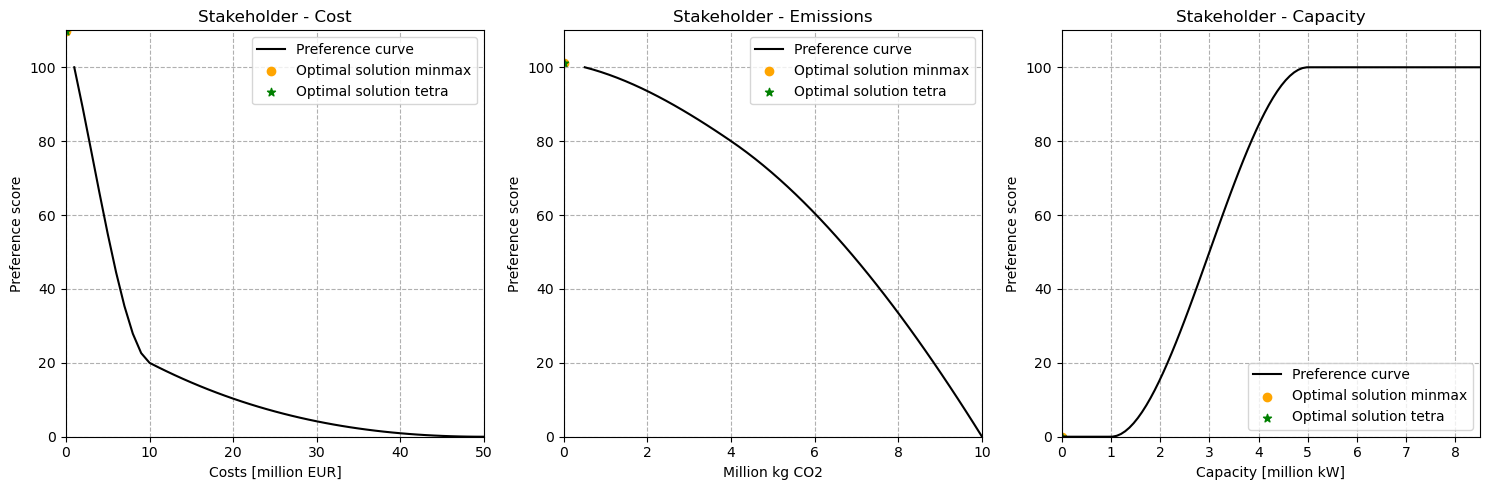

In [3]:

# We run the optimization with two paradigms
paradigm = ['minmax', 'tetra']
marker = ['o', '*']
colours = ['orange', 'green']

# Constants
c1_const = 25   # Costs per material m3
c2_const = 4    # Cost of fuel use per L
c3_const = 0.1  # Emission of materials per m3
c4_const = 1.2  # Emission of fuel per L

k1 = 1.7   # Height of island
k2 = 1.9   # Ship size
k3 = 0.9   # Fuel use per km

# Create figure and axes
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

for i in range(2):
    # Dictionary with parameter settings for the GA run
    options = {
        'n_bits': 8,
        'n_iter': 400,
        'n_pop': 500,
        'r_cross': 0.8,
        'max_stall': 8,
        'aggregation': paradigm[i],  # minmax or tetra
        'var_type': 'real'
    }

    print(f'Run GA with {paradigm[i]}')
    ga = GeneticAlgorithm(objective=objective, constraints=cons, bounds=bounds, options=options)
    result = ga.run()
    if len(result) == 3:
        score_IMAP, design_variables_IMAP, _ = result
    else:
        score_IMAP, design_variables_IMAP = result[0], result[1]

    print(f'Optimal result for x1 = {round(design_variables_IMAP[0], 2)} size and '
          f'x2 = {round(design_variables_IMAP[1], 2)} distance')

    # Calculate individual preference scores
    F1 = design_variables_IMAP[0] * k1  # Material in m3
    F2 = k3 * ((F1 / k2) * design_variables_IMAP[1])  # Fuel in L

    O1 = (F1 * c1_const + F2 * c2_const) / 1E6  # total cost (million EUR)
    O2 = (F1 * c3_const + F2 * c4_const) / 1E6  # total emissions (million kg CO2)

    c1_res = O1
    p1_res = pchip_interpolate([1, 10, 50], [100, 20, 0], c1_res)

    c2_res = O2
    p2_res = pchip_interpolate([0.5, 4, 10], [100, 80, 0], c2_res)

    c3_res = design_variables_IMAP[0] * 150 * (np.exp(-1/10 * design_variables_IMAP[1]) + 1) / 1E6
    p3_res = pchip_interpolate([0, 1, 5, 8.5], [0, 0, 100, 100], c3_res)

    print(f"c1_res: {c1_res}, p1_res: {p1_res}")
    print(f"c2_res: {c2_res}, p2_res: {p2_res}")

    # Plot preference curves (only once)
    if i == 0:
        c1_vals = np.linspace(1, 50)
        c2_vals = np.linspace(0.5, 10)
        c3_vals = np.linspace(0, 8.5, 100)

        p1 = pchip_interpolate([1, 10, 50], [100, 20, 0], c1_vals)
        p2 = pchip_interpolate([0.5, 4, 10], [100, 80, 0], c2_vals)
        p3 = pchip_interpolate([0, 1, 5, 8.5], [0, 0, 100, 100], c3_vals)

        ax1.plot(c1_vals, p1, label='Preference curve', color='black')
        ax1.set_xlim((0, 50))
        ax1.set_ylim((0, 110))
        ax1.set_title('Stakeholder - Cost')
        ax1.set_xlabel('Costs [million EUR]')
        ax1.set_ylabel('Preference score')
        ax1.grid(linestyle='--')

        ax2.plot(c2_vals, p2, label='Preference curve', color='black')
        ax2.set_xlim((0, 10))
        ax2.set_ylim((0, 110))
        ax2.set_title('Stakeholder - Emissions')
        ax2.set_xlabel('Million kg CO2')
        ax2.set_ylabel('Preference score')
        ax2.grid(linestyle='--')

        ax3.plot(c3_vals, p3, label='Preference curve', color='black')
        ax3.set_xlim((0, 8.5))
        ax3.set_ylim((0, 110))
        ax3.set_title('Stakeholder - Capacity')
        ax3.set_xlabel('Capacity [million kW]')
        ax3.set_ylabel('Preference score')
        ax3.grid(linestyle='--')

    # Scatter results
    ax1.scatter(c1_res, p1_res, label=f'Optimal solution {paradigm[i]}', color=colours[i], marker=marker[i])
    ax2.scatter(c2_res, p2_res, label=f'Optimal solution {paradigm[i]}', color=colours[i], marker=marker[i])
    ax3.scatter(c3_res, p3_res, label=f'Optimal solution {paradigm[i]}', color=colours[i], marker=marker[i])

# Final plot setup
ax1.legend()
ax2.legend()
ax3.legend()
fig.tight_layout()
plt.show()
